In [1]:


import numpy as np
import pandas as pd

import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

C:\Users\Ashish Sugunan\AppData\Local\Temp\ipykernel_12080\267403632.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Get the images from the dataset and preprocess

In [3]:
def get_and_preprocess(path):
    normal = glob.glob(f'{path}/NORMAL/*')
    pneumonia = glob.glob(f'{path}/PNEUMONIA/*')
    X = []
    y = []
    for i in normal:
        image = cv2.imread(i,0)
        image = cv2.resize(image, (128, 128))
        image = image/255
        image = np.expand_dims(image, axis=-1)  # Add a channel dimension
        X.append(image)
        y.append(0)  #0 for normal
    for i in pneumonia:
        image = cv2.imread(i,0)
        image = cv2.resize(image, (128,128))
        image = image/255
        image = np.expand_dims(image, axis=-1)  # Add a channel dimension
        X.append(image)
        y.append(1)  #1 for pneumonia
    
    return X,y

In [4]:
X_train, y_train = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\train')
X_val, y_val = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\val')
X_test, y_test = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\test')


In [5]:
len(X_train)

5216

In [6]:
print(y_train.count(0))
print(y_train.count(1))

1341
3875


### Visualization of images

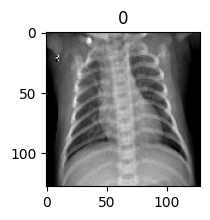

In [7]:
plt.figure(figsize=(2, 2))

# Check the length of X_train and y_train
data_length = len(X_train)

# Make sure the index is within the valid range
index_to_display = 22
if index_to_display < data_length:
    plt.imshow(X_train[index_to_display], cmap='gray')
    plt.title(str(y_train[index_to_display]))
    plt.show()
else:
    print(f"Invalid index: {index_to_display}. Dataset length is {data_length}.")



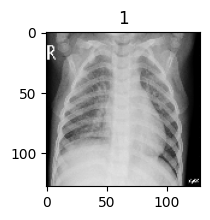

In [8]:
plt.figure(figsize=(2, 2))

# Check the length of X_train and y_train
data_length = len(X_train)

# Specify the index to display
index_to_display = 1564

# Make sure the index is within the valid range
if 0 <= index_to_display < data_length:
    plt.imshow(X_train[index_to_display], cmap='gray')
    plt.title(str(y_train[index_to_display]))
    plt.show()
else:
    print(f"Invalid index: {index_to_display}. Dataset length is {data_length}.")


### Model Building

In [9]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [10]:
print("Length of X_train:", len(X_train))

if len(X_train) > 0:
    print("Shape of the first element in X_train:", X_train[0].shape)
else:
    print("X_train is empty.")


Length of X_train: 5216
Shape of the first element in X_train: (128, 128, 1)


In [11]:
y_train = to_categorical(y_train,num_classes=2)
y_val = to_categorical(y_val,num_classes=2)
y_test = to_categorical(y_test,num_classes=2)

In [12]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [13]:
model = Sequential()
model.add(Conv2D(128,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(8,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(8,(3,3),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))

model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2,activation='softmax'))

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.metrics.Precision(name='precision')])

In [15]:
# Check the shapes of your data before fitting
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check if data is non-empty
if X_train.size == 0 or y_train.size == 0:
    print("Error: Input data is empty.")
else:
    # Train the model
    model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Shape of X_train: (5216, 128, 128, 1)
Shape of y_train: (5216, 2)
Epoch 1/10


163/163 [==============================] - 44s 249ms/step - loss: 0.5667 - accuracy: 0.7387 - precision: 0.7387 - val_loss: 0.7942 - val_accuracy: 0.5000 - val_precision: 0.5000
Epoch 2/10
163/163 [==============================] - 47s 289ms/step - loss: 0.3483 - accuracy: 0.8495 - precision: 0.8495 - val_loss: 0.5632 - val_accuracy: 0.8125 - val_precision: 0.8125
Epoch 3/10
163/163 [==============================] - 50s 308ms/step - loss: 0.1957 - accuracy: 0.9237 - precision: 0.9237 - val_loss: 0.5730 - val_accuracy: 0.8125 - val_precision: 0.8125
Epoch 4/10
163/163 [==============================] - 39s 240ms/step - loss: 0.1435 - accuracy: 0.9444 - precision: 0.9444 - val_loss: 0.7560 - val_accuracy: 0.6875 - val_precision: 0.6875
Epoch 5/10
163/163 [==============================] - 39s 238ms/step - loss: 0.1235 - accuracy: 0.9513 - precision: 0.9513 - val_loss: 0.7098 - val_accuracy: 0.6875 - val_preci

In [16]:
# Assuming you have compiled your model before training
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print shapes and sizes for debugging
print("Shape of X_test:", X_test.shape)
print("Size of X_test:", X_test.size)
print("Shape of y_test:", y_test.shape)
print("Size of y_test:", y_test.size)

# Check if data is non-empty
if X_test.size > 0 and y_test.size > 0:
    # Evaluate the model on the test set
    evaluation_result = model.evaluate(X_test, y_test)

    # Print the evaluation result
    print("Test Loss:", evaluation_result[0])
    print("Test Accuracy:", evaluation_result[1])
else:
    print("Error: Input data is empty.")



Shape of X_test: (624, 128, 128, 1)
Size of X_test: 10223616
Shape of y_test: (624, 2)
Size of y_test: 1248
20/20 [==============================] - 2s 97ms/step - loss: 0.7978 - accuracy: 0.7660 - precision: 0.7660
Test Loss: 0.7977854013442993
Test Accuracy: 0.7660256624221802


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
preds = model.predict(X_test)
y_pred = np.argmax(preds,axis=1)
y_test = np.argmax(y_test,axis=1)




20/20 [==============================] - 2s 80ms/step


In [19]:

preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


20/20 [==============================] - 2s 82ms/step
[[ 90 144]
 [  2 388]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.38      0.55       234
           1       0.73      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.85      0.69      0.70       624
weighted avg       0.82      0.77      0.73       624



In [21]:
model.save('pneumonia.h5')

c:\Users\Ashish Sugunan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
def predict_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (128, 128))
    img = img / 255
    img = np.expand_dims(img, axis=-1)
    img = img.reshape((1,) + img.shape)
    return img

image_path = 'C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\test\\PNEUMONIA\\person100_bacteria_482.jpeg'
image = predict_image(image_path)

pred = np.argmax(model.predict(image), axis=1)
if pred == 0:
    print("NORMAL")
else:
    print("PNEUMONIA")

1/1 [==============================] - 0s 57ms/step
PNEUMONIA


In [23]:
def predict_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (128, 128))
    img = img / 255
    img = np.expand_dims(img, axis=-1)
    img = img.reshape((1,) + img.shape)
    return img

image_path = 'C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\xray buttockss.jpeg'
image = predict_image(image_path)

pred = np.argmax(model.predict(image), axis=1)
if pred == 0:
    print("NORMAL")
else:
    print("PNEUMONIA")

1/1 [==============================] - 0s 42ms/step
NORMAL


In [24]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
# Calculate and print other evaluation metrics
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Alternatively, you can use scikit-learn's classification_report for a comprehensive report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 90 144]
 [  2 388]]

Accuracy: 0.7660256410256411
Precision: 0.7293233082706767
Recall: 0.9948717948717949
F1 Score: 0.841648590021692

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.38      0.55       234
           1       0.73      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.85      0.69      0.70       624
weighted avg       0.82      0.77      0.73       624



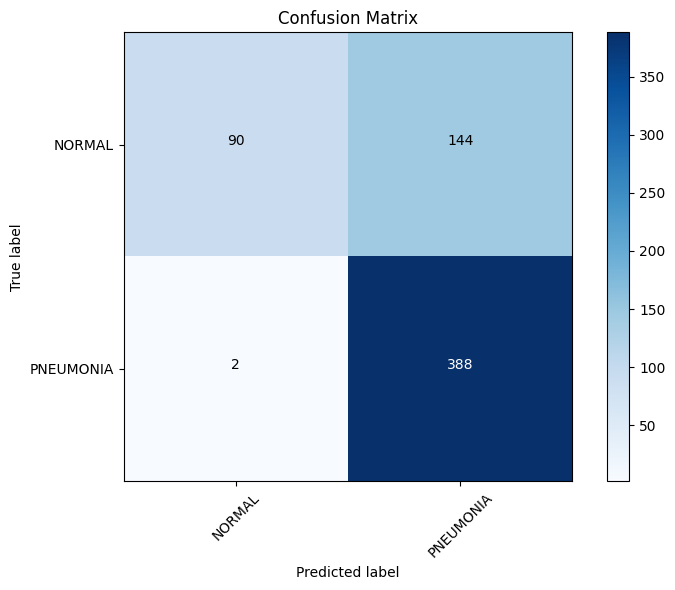


Accuracy: 76.6025641025641 %
Precision: 72.93233082706767 %
Recall: 99.48717948717949 %
F1 Score: 84.1648590021692 %


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['NORMAL', 'PNEUMONIA']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display values in each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Show plot
plt.show()

# Calculate and print performance metrics
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy * 100, "%")
print("Precision:", precision * 100, "%")
print("Recall:", recall * 100, "%")
print("F1 Score:", f1_score * 100, "%")

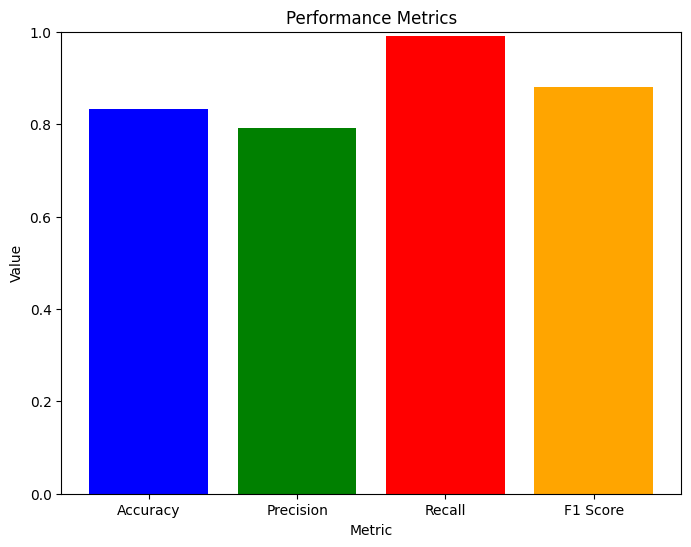

In [26]:
import matplotlib.pyplot as plt

# Define performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

# Plot performance metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for better visualization of percentage values
plt.show()